<a href="https://colab.research.google.com/github/raulbenitez/LEUKEMIA_database/blob/main/Leukemia_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALL-IDB database

Acute Lymphoblastic Leukemia Image Database for Image Processing

Department of Computer Science - Università degli Studi di Milano

https://homes.di.unimi.it/scotti/all/

https://www.kaggle.com/nikhilsharma00/leukemia-dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
import os
import numpy as np
import skimage as sk # load skimage libraries
from skimage import io
import pandas as pd

root_folder_im = '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im'
root_folder_pos = '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc'

VOL = io.ImageCollection(root_folder_im + '/*.jpg')

v=[]
zt = []

for root, dirs, files in os.walk(root_folder_pos, topdown=False):
    for name in sorted(files):
        #print(os.path.join(root, name))
        z = np.loadtxt(os.path.join(root, name),ndmin=2) # get cell positions
        y = np.repeat([np.int(name[-9:-6]), np.int(name[-5])], z.shape[0], axis=0) # get image number and class label
        y = np.reshape(y,(2,np.int(y.shape[0]/2))).T

        if (z.shape[0]==0):
          z = [0,0,np.int(name[-9:-6]), np.int(name[-5])]
        else:
          z = np.concatenate((z,y),axis=1)
        zt = np.append(zt,z)

zt = np.reshape(zt,(np.int(zt.shape[0]/4),4))
df = pd.DataFrame(zt,columns=['x','y','image','class'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning:

loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im034_0.xyc"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning:

loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im035_0.xyc"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning:

loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im036_0.xyc"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning:

loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im037_0.xyc"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning:

loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im038_0.xyc"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning:

l

In [160]:
df.head()

,x,y,image,class
0,886.0,726.0,1.0,1.0
1,796.0,653.0,1.0,1.0
2,894.0,611.0,1.0,1.0
3,964.0,681.0,1.0,1.0
4,1020.0,605.0,1.0,1.0


Visualize image with marked cells

In [161]:
VOL[0].shape

(1368, 1712, 3)

In [162]:
df1=df.loc[df['image']==1]
pos = np.int64(df1[['x','y']].values)

In [163]:
VOL.files

['/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im001_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im002_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im003_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im004_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im005_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im006_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im007_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im008_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im009_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im010_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im011_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im012_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/

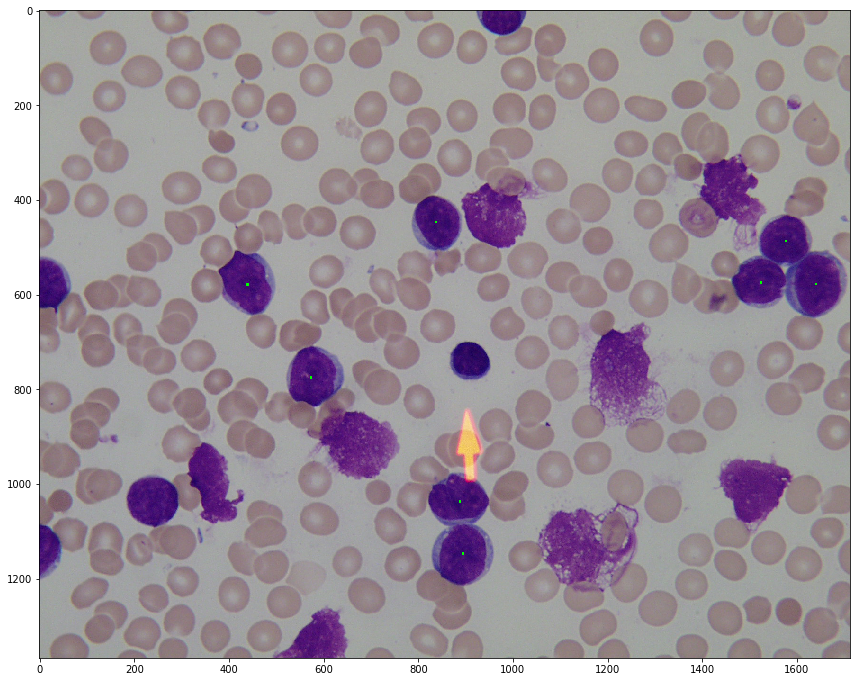

In [168]:
import skimage as sk # load skimage libraries
import matplotlib.pyplot as plt

IM_number = 2
df1=df.loc[df['image']==IM_number]
pos = np.int64(df1[['x','y']].values)

for kpos in np.arange(pos.shape[0]):
  VOL[IM_number-1][pos[kpos,1]:pos[kpos,1]+5,pos[kpos,0]:pos[kpos,0]+5,:]=[0,255,0]

fig = plt.figure(figsize=(12,12))
sk.io.imshow(VOL[IM_number-1]) # visualize image using imshow function
sk.io.show() 

# GMM clustering segmentation

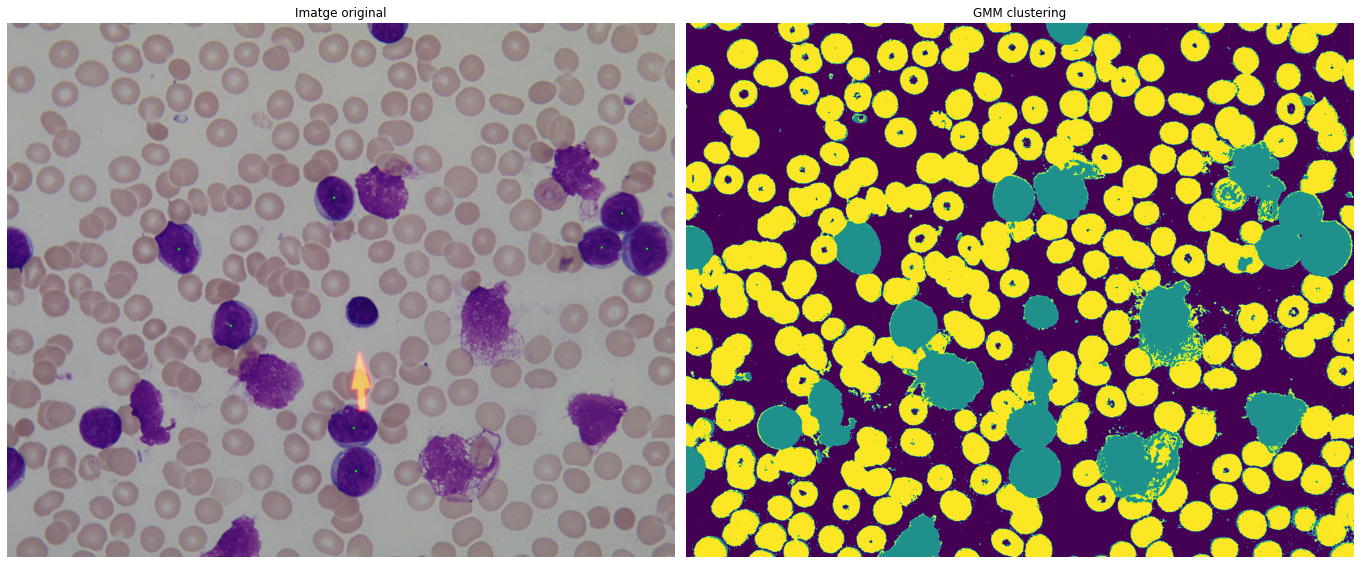

In [169]:
import skimage as sk # load skimage libraries
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec


I = VOL[IM_number-1] # load RGM image
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2])) # reshape image as NPIX x NCHANNELS array
gmm = mixture.GaussianMixture(n_components=3).fit(v_I) # Fit a GMM model
v_gmm = gmm.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_segment = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(19, 19))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I)
ax0.set_title('Imatge original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_segment)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

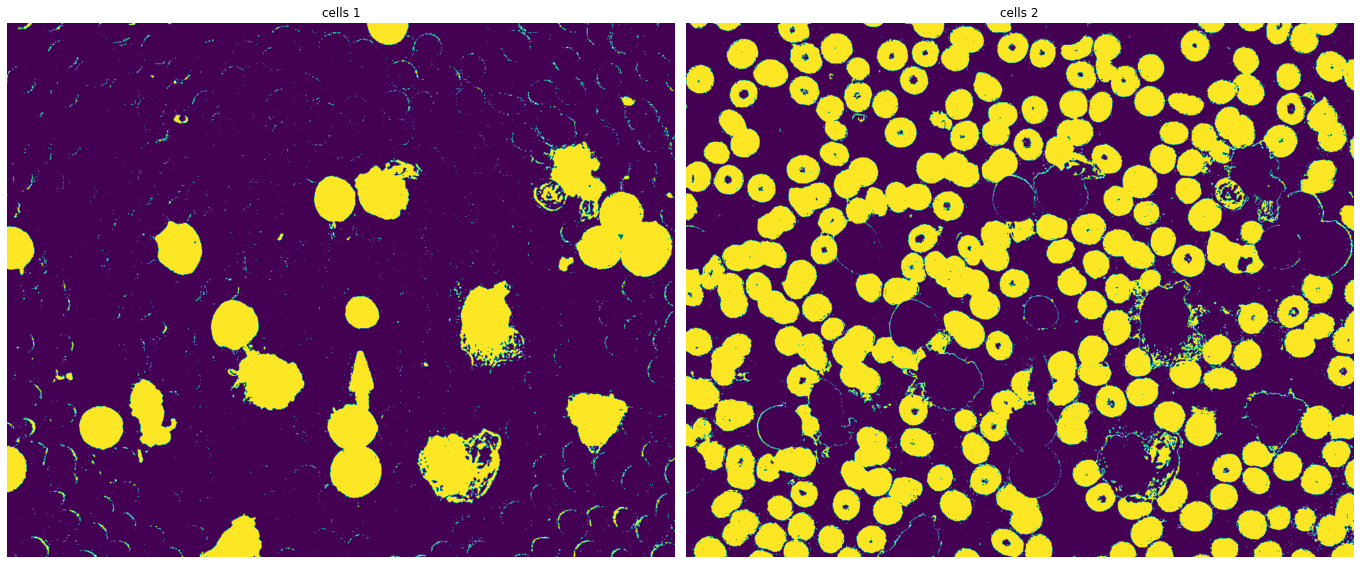

In [172]:
fig = plt.figure(figsize=(19, 19))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I_segment==1)
ax0.set_title('cells 1')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_segment==2)
ax1.set_title('cells 2')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

In [183]:
from skimage import data, measure
label_image, nregions = measure.label(I_segment==1,return_num=True)
props_aux = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent'])
df = pd.DataFrame(props_aux)
df1 = df.loc[df['area']>500]
df1.head()

,label,area,eccentricity,extent
7,8,4671,0.827124,0.779539
584,585,595,0.785664,0.635684
951,952,17381,0.615435,0.492938
1063,1064,15894,0.517256,0.610697
1144,1145,9970,0.502744,0.686545


In [184]:
df1.shape

(20, 4)

In [185]:
from skimage import data, measure
label_image, nregions = measure.label(I_segment==2,return_num=True)
props_aux = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent'])
df = pd.DataFrame(props_aux)
df2 = df.loc[df['area']>500]
df2.head()

,label,area,eccentricity,extent
1,2,922,0.939516,0.618377
2,3,3279,0.778400,0.756401
4,5,2642,0.874264,0.653960
5,6,1362,0.915550,0.793706
9,10,1269,0.908544,0.717760


In [186]:
df2.shape

(165, 4)